In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [7]:
df = pd.read_csv("breast-cancer.csv")


In [15]:

data = load_breast_cancer()


df = pd.DataFrame(data.data, columns=data.feature_names)
X = df[["mean radius", "mean texture"]].values
y = data.target
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
print("\nFirst 5 rows of X:")
print(X[:5])
print("\nFirst 5 labels of y:")
print(y[:5])

Shape of X: (569, 2)
Shape of y: (569,)

First 5 rows of X:
[[17.99 10.38]
 [20.57 17.77]
 [19.69 21.25]
 [11.42 20.38]
 [20.29 14.34]]

First 5 labels of y:
[0 0 0 0 0]


In [16]:
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [17]:
kernels = ["linear", "rbf", "poly"]
for k in kernels:
    clf = SVC(kernel=k, C=1, gamma="scale").fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    print(f"\n🔹 Kernel = {k}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=data.target_names))


🔹 Kernel = linear
Accuracy: 0.868421052631579
              precision    recall  f1-score   support

   malignant       0.83      0.81      0.82        42
      benign       0.89      0.90      0.90        72

    accuracy                           0.87       114
   macro avg       0.86      0.86      0.86       114
weighted avg       0.87      0.87      0.87       114


🔹 Kernel = rbf
Accuracy: 0.9035087719298246
              precision    recall  f1-score   support

   malignant       0.86      0.88      0.87        42
      benign       0.93      0.92      0.92        72

    accuracy                           0.90       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.90      0.90      0.90       114


🔹 Kernel = poly
Accuracy: 0.868421052631579
              precision    recall  f1-score   support

   malignant       1.00      0.64      0.78        42
      benign       0.83      1.00      0.91        72

    accuracy                           0.87  

Accuracy: 0.868421052631579


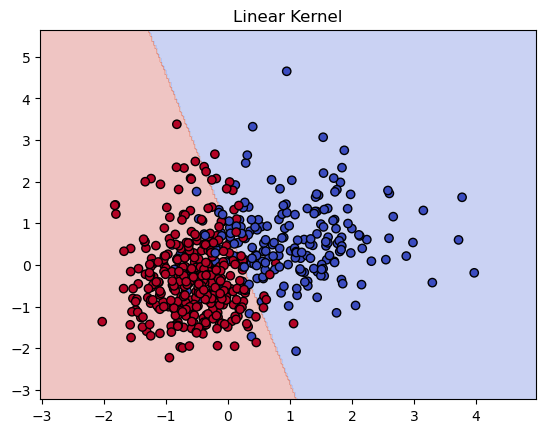

In [26]:
X, y = load_breast_cancer(return_X_y=True)
X = X[:, :2]  # only 2 features
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

clf = SVC(kernel="linear").fit(X_train, y_train)
print("Accuracy:", clf.score(X_test, y_test))

xx, yy = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 300),
                     np.linspace(X[:,1].min()-1, X[:,1].max()+1, 300))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
plt.scatter(X[:,0], X[:,1], c=y, cmap="coolwarm", edgecolors="k")
plt.title("Linear Kernel")
plt.show()

Accuracy: 0.8859649122807017


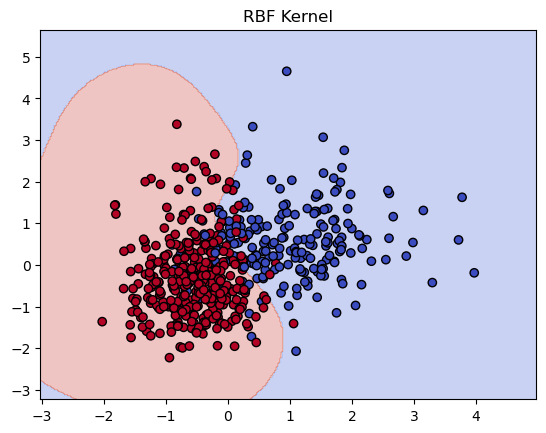

In [27]:
X, y = load_breast_cancer(return_X_y=True)
X = X[:, :2]
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

clf = SVC(kernel="rbf", gamma=0.5).fit(X_train, y_train)
print("Accuracy:", clf.score(X_test, y_test))

xx, yy = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 300),
                     np.linspace(X[:,1].min()-1, X[:,1].max()+1, 300))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
plt.scatter(X[:,0], X[:,1], c=y, cmap="coolwarm", edgecolors="k")
plt.title("RBF Kernel")
plt.show()

Accuracy: 0.8947368421052632


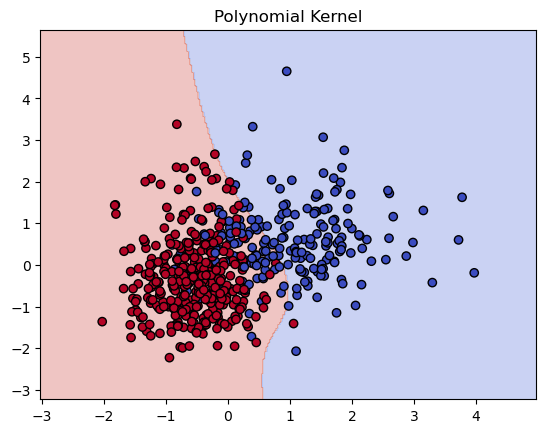

In [28]:
X, y = load_breast_cancer(return_X_y=True)
X = X[:, :2]
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

clf = SVC(kernel="poly", degree=3).fit(X_train, y_train)
print("Accuracy:", clf.score(X_test, y_test))

xx, yy = np.meshgrid(np.linspace(X[:,0].min()-1, X[:,0].max()+1, 300),
                     np.linspace(X[:,1].min()-1, X[:,1].max()+1, 300))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
plt.scatter(X[:,0], X[:,1], c=y, cmap="coolwarm", edgecolors="k")
plt.title("Polynomial Kernel")
plt.show()

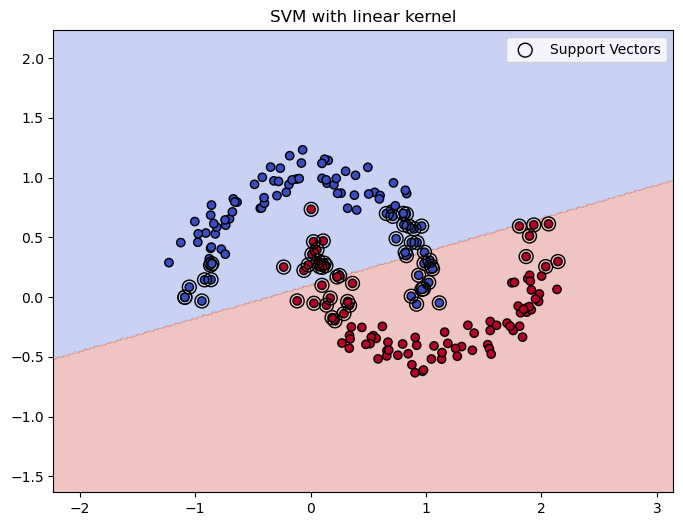

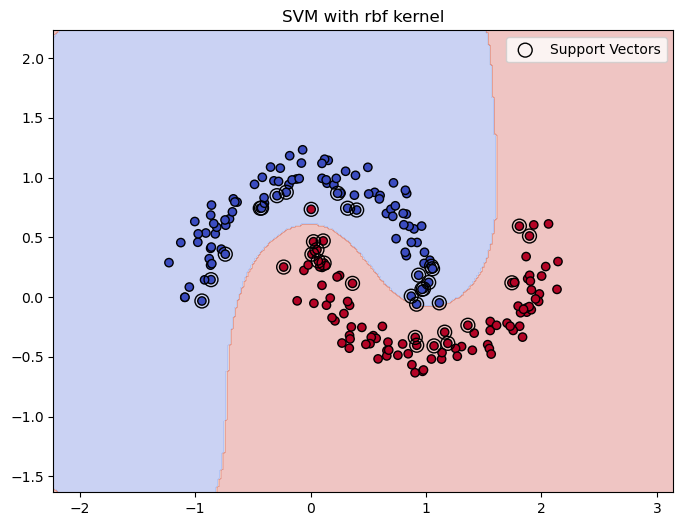

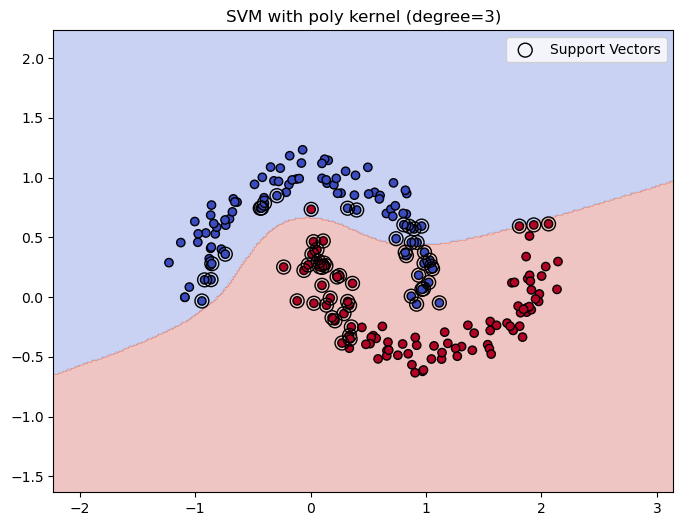

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC

X, y = datasets.make_moons(n_samples=200, noise=0.1, random_state=42)

def plot_svm(X, y, k, degree=3):
    if k == 'poly':
        clf = SVC(kernel=k, degree=degree)
    else:
        clf = SVC(kernel=k)
    clf.fit(X, y)

    xx, yy = np.meshgrid(
        np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 300),
        np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 300)
    )

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolors="k")

    if hasattr(clf, 'support_vectors_'):
        plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
                    s=100, facecolors='none', edgecolors='k', label="Support Vectors")

    title = f"SVM with {k} kernel"
    if k == 'poly':
        title += f" (degree={degree})"
    plt.title(title)
    plt.legend()
    plt.show()

plot_svm(X, y, 'linear')
plot_svm(X, y, 'rbf')
plot_svm(X, y, 'poly', degree=3)

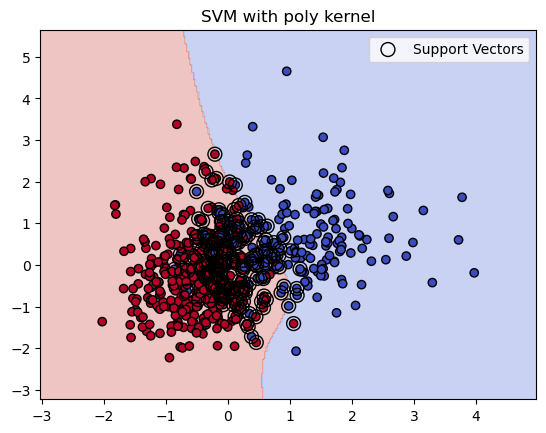

In [31]:
 # 4️ Plot decision boundary + support vectors

xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 300),
    np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 300)
)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", edgecolors="k")
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=100, facecolors='none', edgecolors='k', label="Support Vectors")
plt.title(f"SVM with {k} kernel")
plt.legend()
plt.show()



In [23]:
param_grid = {"C": [0.1, 1, 10], "gamma": [0.1, 0.01, 0.001]}
grid = GridSearchCV(SVC(kernel="rbf"), param_grid, cv=3)
grid.fit(X_train, y_train)
print("\n Best parameters (RBF):", grid.best_params_)
best_model = grid.best_estimator_


 Best parameters (RBF): {'C': 10, 'gamma': 0.01}


In [24]:
y_pred = best_model.predict(X_test)
print("Tuned RBF Accuracy:", accuracy_score(y_test, y_pred))

Tuned RBF Accuracy: 0.8771929824561403


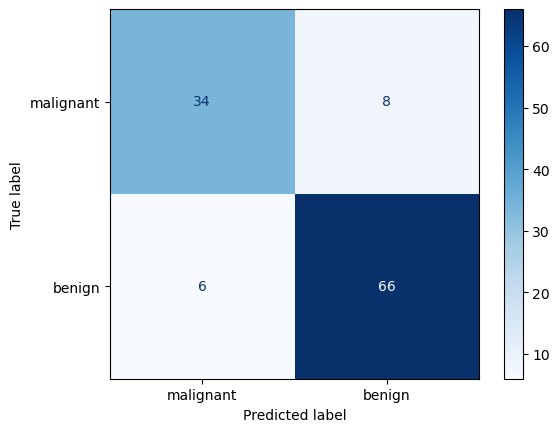

In [25]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=data.target_names).plot(cmap="Blues")
plt.show()